In [2]:
#libraries used
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# About the dataset

In [3]:
rent=pd.read_csv("C:/Users/Tanisha/OneDrive/Desktop/projects/House_Rent_Dataset.csv")

In [4]:
rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
objects = rent.select_dtypes(include='object').columns

In [6]:
le = preprocessing.LabelEncoder()

for i in range(0,len(objects)):
    rent[objects[i]] = le.fit_transform(rent[objects[i]])

In [7]:
rent.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,26,2,10000,1100,455,2,221,4,2,1,2,2
1,21,2,20000,800,14,2,1527,4,1,1,1,2
2,24,2,17000,1000,14,2,1760,4,1,1,1,2
3,73,2,10000,800,10,2,526,4,2,1,1,2
4,17,2,7500,850,10,1,1890,4,2,0,1,2


In [8]:
rent.shape

(4746, 12)

In [9]:
rent.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Floor', 'Area Type',
       'Area Locality', 'City', 'Furnishing Status', 'Tenant Preferred',
       'Bathroom', 'Point of Contact'],
      dtype='object')

In [10]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Posted On          4746 non-null   int32
 1   BHK                4746 non-null   int64
 2   Rent               4746 non-null   int64
 3   Size               4746 non-null   int64
 4   Floor              4746 non-null   int32
 5   Area Type          4746 non-null   int32
 6   Area Locality      4746 non-null   int32
 7   City               4746 non-null   int32
 8   Furnishing Status  4746 non-null   int32
 9   Tenant Preferred   4746 non-null   int32
 10  Bathroom           4746 non-null   int64
 11  Point of Contact   4746 non-null   int32
dtypes: int32(8), int64(4)
memory usage: 296.8 KB


# cleaning

In [11]:
rent.rename(columns={'Furnishing Status':'Furnishing_status'}, inplace=True) 

In [12]:
rent.rename(columns={'Posted On':'Posted_on'}, inplace=True) 

In [13]:
rent.rename(columns={'Area Type':'Area_type'}, inplace=True) 

In [14]:
rent.isnull().any()

Posted_on            False
BHK                  False
Rent                 False
Size                 False
Floor                False
Area_type            False
Area Locality        False
City                 False
Furnishing_status    False
Tenant Preferred     False
Bathroom             False
Point of Contact     False
dtype: bool

In [15]:
rent.isna().sum()

Posted_on            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area_type            0
Area Locality        0
City                 0
Furnishing_status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

<AxesSubplot:xlabel='Rent'>

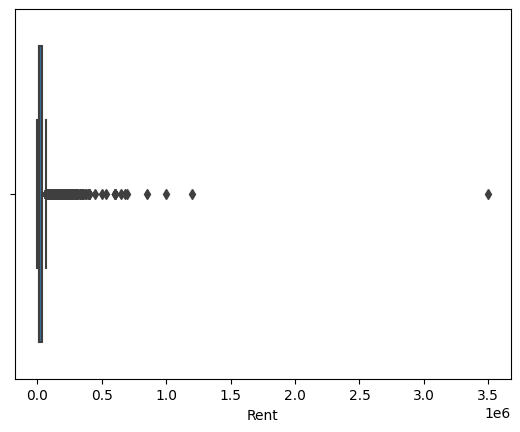

In [16]:
sns.boxplot(x="Rent",data=rent)

In [17]:
rent.drop(rent[(rent['Rent'] > 110000)].index, inplace=True)

<AxesSubplot:xlabel='Rent'>

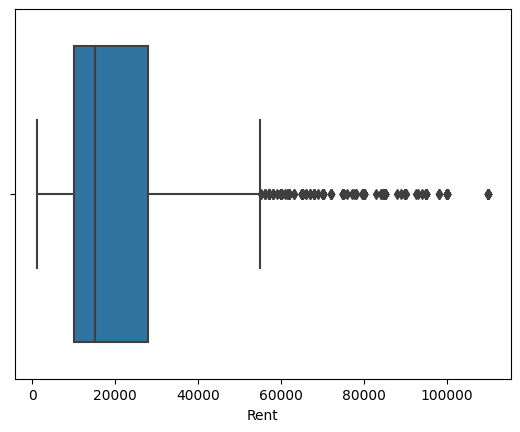

In [18]:
sns.boxplot(x="Rent",data=rent)

<AxesSubplot:xlabel='Size'>

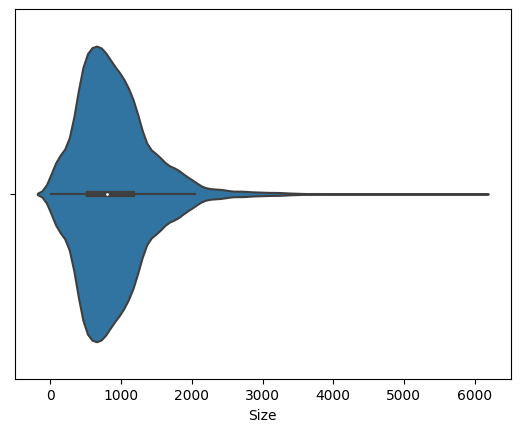

In [19]:
sns.violinplot(x="Size",data=rent)

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

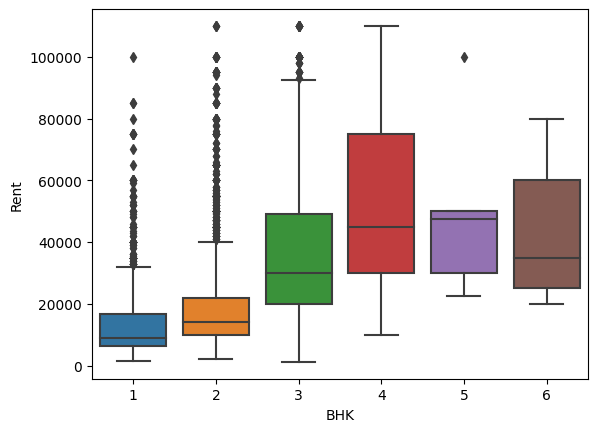

In [20]:
sns.boxplot(x="BHK",y="Rent",data=rent)

# Visual Analysis

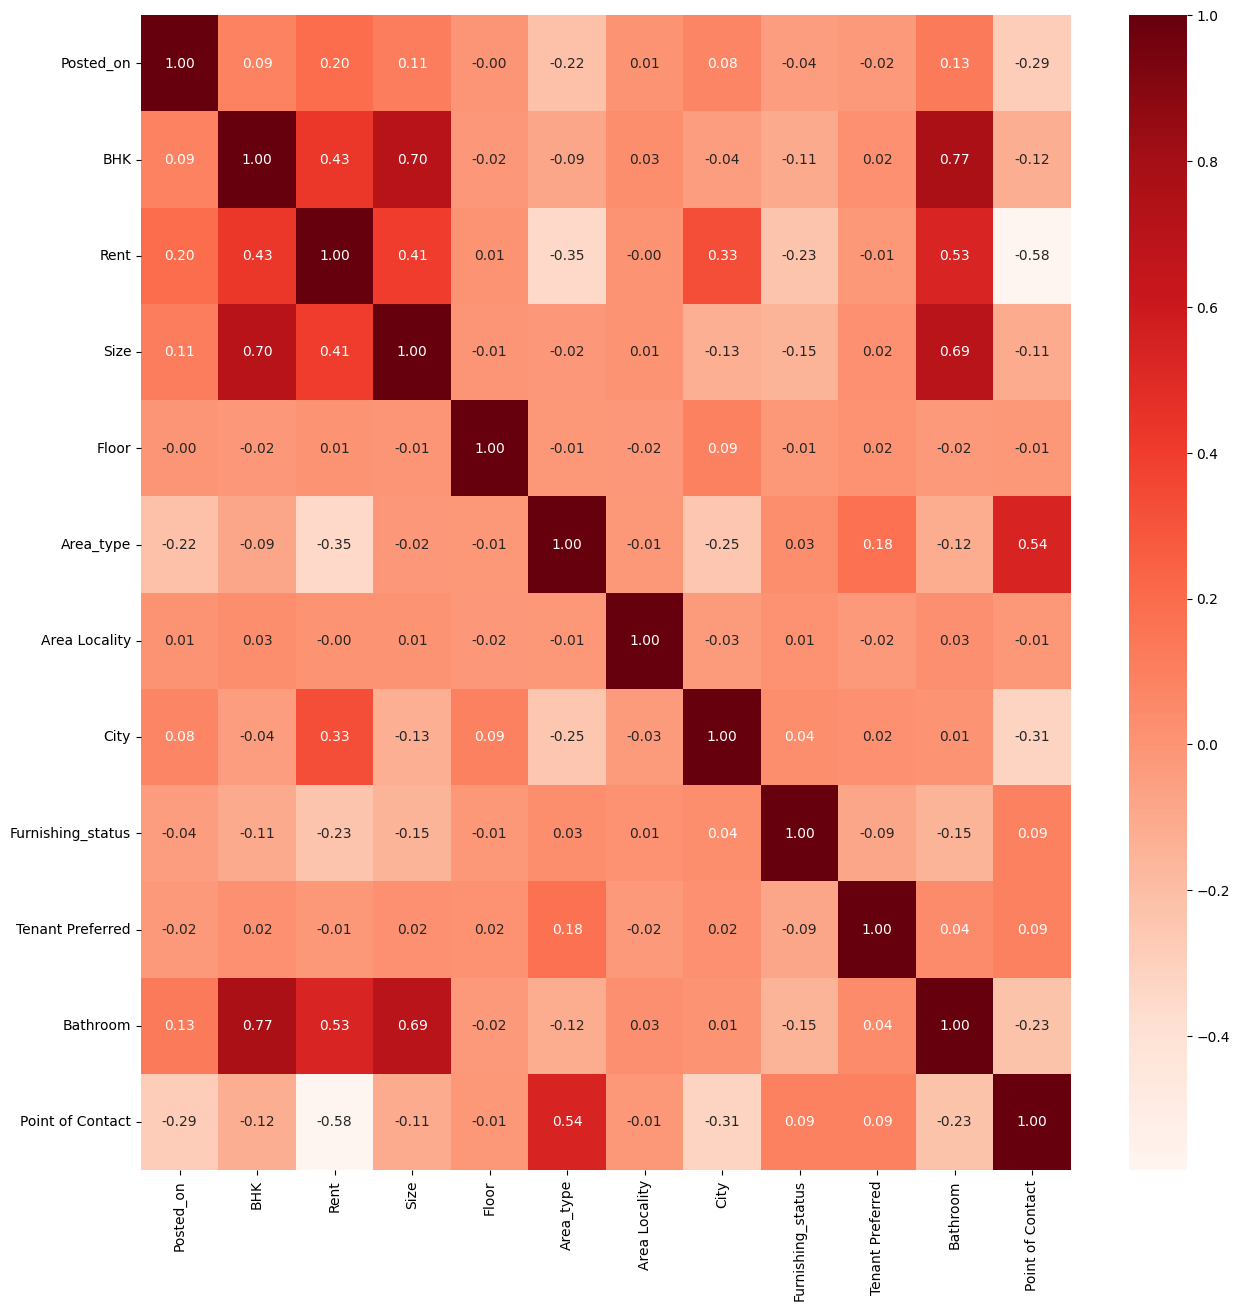

In [21]:
plt.figure(figsize=(15,15))
cor = rent.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds,fmt='.2f')
plt.show()

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

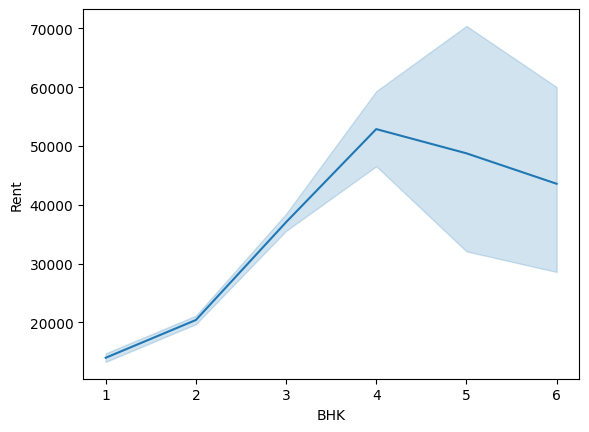

In [22]:
sns.lineplot(x="BHK",y="Rent",data=rent)

<AxesSubplot:xlabel='Size', ylabel='Rent'>

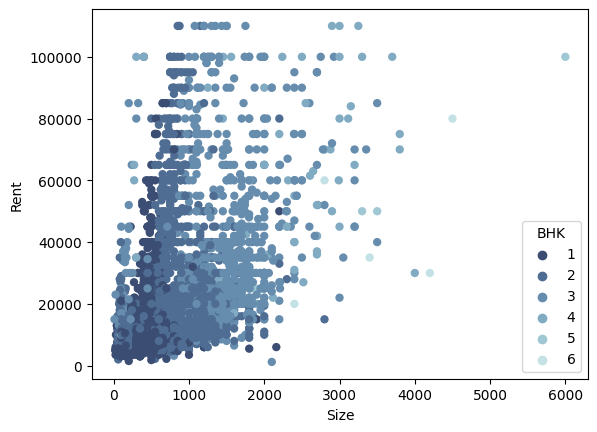

In [23]:
sns.scatterplot(x="Size",y="Rent",hue="BHK",data=rent,palette="ch:r=-.2,d=.3_r",
                sizes=(1, 8), linewidth=0,
                 )

C:\Users\Tanisha\AppData\Local\Temp\ipykernel_16816\930411711.py:1: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="City",y="Rent",data=rent,palette="ch:r=-.2,d=.3_r")


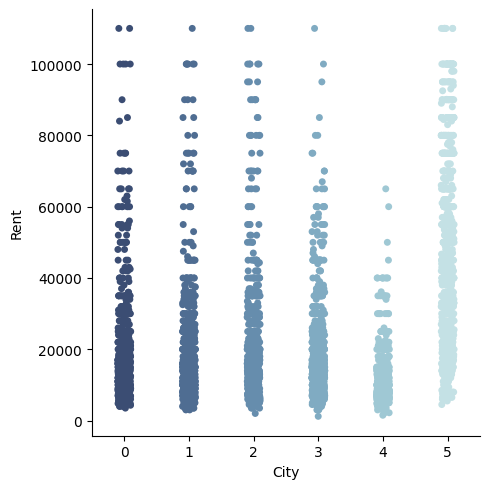

In [24]:
sns.catplot(x="City",y="Rent",data=rent,palette="ch:r=-.2,d=.3_r")

In [25]:
df = rent.loc[:,["Rent","Size"]]

In [26]:
import matplotlib.pyplot as plt


In [27]:
from pandas import DataFrame
import matplotlib.pyplot as plt

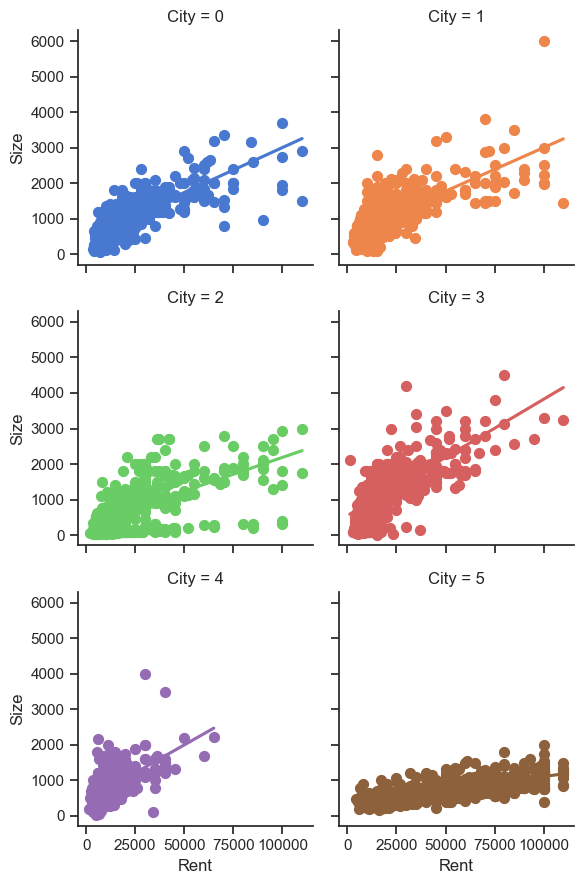

In [28]:
sns.set_theme(style="ticks")
sns.lmplot(
    data=rent, x="Rent", y="Size", col="City", hue="City",
    col_wrap=2, palette="muted", ci=None,
    height=3, scatter_kws={"s": 50, "alpha": 1}
)


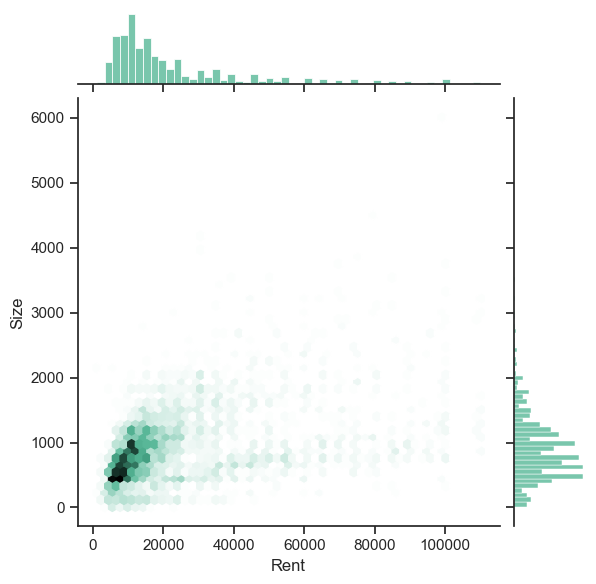

In [29]:
x = rent.Rent
y = rent.Size

sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")


# Machine learning model


In [30]:
X = rent.drop(columns=['Rent'])
y = rent['Rent']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=44, shuffle =True)

In [32]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.fit(X_test,y_test)

LinearRegression()

In [33]:
print("by linear regression")
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

by linear regression


array([0.59463378, 0.60177724, 0.5757506 , 0.54735361, 0.55985865])

In [34]:
print(" by Random Forest ")
Rf = RandomForestRegressor(n_estimators=500,max_depth=7, random_state=33)
Rf.fit(X_train, y_train)

print(' Train Score  : ' , Rf.score(X_train, y_train))
print(' Test Score  : ' , Rf.score(X_test, y_test))

 by Random Forest 
 Train Score  :  0.8392244876503971
 Test Score  :  0.7985215206178062


In [35]:
print("by gradient boosting")
Gr = GradientBoostingRegressor(n_estimators=200,max_depth=5,learning_rate = 0.03,random_state=44)
Gr.fit(X_train, y_train)

print('Train Score is : ' , Gr.score(X_train, y_train))
print('Test Score is : ' , Gr.score(X_test, y_test))

by gradient boosting
Train Score is :  0.8713749992361699
Test Score is :  0.8098599723513978
